# Sample space analysis

In [1]:
# We are going to create a sample space for a coin, it is going to be a set 
sample_space = {'Heads', 'Tails'}

In [2]:
# Let us compute the probability of heads
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


In [3]:
# We are going to define two event conditions 
# One where the coin lands on either head or tail 
# The second condition is where the coin lands on neither head or tail
def is_heads_or_tails(outcome) : return outcome in {'Heads', 'Tails'}
def is_neither(outcome): return outcome not in {'Heads', 'Tails'}

In [4]:
# Let us also define event conditions for the two basic events
def is_heads(outcome): return outcome == 'Heads'
def is_tails(outcome): return outcome == 'Tails'

In [5]:
# Let us define a function with inputs as an event condition and a generic sample space
# The function iterates through the generic sample space and returns the set of outcomes
# where event_condition(outcome) is True 
def get_matching_event(event_condition, sample_space) :
    return set(
        [
            outcome for outcome in sample_space
            if event_condition(outcome)
        ]
    )

In [6]:
# We will execute the get_matching event on our four event conditions 
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]
for event_condition in event_conditions:
    print(f'Event Condition: {event_condition.__name__}')
    event = get_matching_event(event_condition, sample_space)
    print(f'Event: {event}\n')


Event Condition: is_heads_or_tails
Event: {'Tails', 'Heads'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [7]:
# Now we are going to use event size to compute the four event probabilities 
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)

for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f'Probability of event arising from \'{name}\' is {prob}')

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


In [8]:
# Now we are going to attempt to analyse a biased coin by assigning weights
# We are going to assume that a coin is four times more likely to land on heads relative to tails 
weighted_sample_space = {'Heads' : 4, 'Tails': 1}
# Our new sample_space is stored in a dictionary and the sum of weights is 5
# We can still confirm that if we want to 
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5
print(sample_space_size)

5


In [9]:
# We are going to check the weighted event size 
# Recall that python iterates of dictionary keys 
event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [10]:
# Let us define a generalized event probability function 
# The generic_sample_space variable can either be a weighed dictionary or an unweighted set
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome]
        for outcome in event)
    return event_size / sum(generic_sample_space.values())

# We can now output all the event probabilities for the biased coin 
# without needing to redefine our four event conditions 

In [11]:
# Let us try computing weighted event probabilities
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f'Probability of event arising from \'{name}\' is {prob}')

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


# Computing non-trivial probabilities

With just a few lines of code we have been able to construct a tool for solving many problems in probability. We are now going to use this tool to solve more complex problems 
 

Suppose a family has four children. What is the probability that exactly two of the chil-
dren are boys? We’ll assume that each child is equally likely to be either a boy or a girl.


In [12]:
# Computing the smaple space of children 
possible_children = ['Boy', 'Girl']
sample_space = set()
for child_1 in possible_children:
    for child_2 in possible_children:
        for child_3 in possible_children:
            for child_4 in possible_children:
                outcome = (child_1, child_2, child_3, child_4)
                sample_space.add(outcome)

print(sample_space)

{('Boy', 'Boy', 'Boy', 'Boy'), ('Boy', 'Boy', 'Boy', 'Girl'), ('Boy', 'Girl', 'Boy', 'Boy'), ('Boy', 'Girl', 'Boy', 'Girl'), ('Girl', 'Boy', 'Girl', 'Girl'), ('Girl', 'Girl', 'Girl', 'Boy'), ('Girl', 'Girl', 'Girl', 'Girl'), ('Boy', 'Girl', 'Girl', 'Boy'), ('Girl', 'Boy', 'Boy', 'Boy'), ('Girl', 'Boy', 'Boy', 'Girl'), ('Girl', 'Boy', 'Girl', 'Boy'), ('Boy', 'Girl', 'Girl', 'Girl'), ('Girl', 'Girl', 'Boy', 'Boy'), ('Girl', 'Girl', 'Boy', 'Girl'), ('Boy', 'Boy', 'Girl', 'Boy'), ('Boy', 'Boy', 'Girl', 'Girl')}


In [13]:
# We ran four nested for loops to explore the sequences of four births but this is not an efficient
# use of code. We are going to use the itertools.product function to make our code more efficient 
from itertools import product
all_combinations = product(*(4 * [possible_children]))

In [14]:
# We can even to make our code more efficient by using repeat
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient

In [15]:
# Now we are going to calculate for the fraction of sample_space that is composed of families with two boys 
# Let us define a has_two_boys event condition and then pass the condition into compute event_probability
def has_two_boys(outcome):
    return len([child for child in outcome if child =='Boy']) == 2

prob = compute_event_probability(has_two_boys, sample_space)
print(f'Probability of 2 boys is 0.375')

Probability of 2 boys is 0.375


The probability of exactly two boys being born in a family of four children is 0.375. By implication, we expect 37.5% of families with four children to contain an equal number of boys and girls. Of course, the actual observed percentage of families with two boys will vary due to random chance.


# Analyzing multiple die rolls 

In [16]:
# If we're shown a fair six-sided die whose faces are numbered 1 - 6. The die is rolled 6 times. What is 
# the probability that these six die rolls add up to 21. We are going to begin by defining the possible
# values of any single die roll
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


In [17]:
# Now we will create a sample space for 6 consecutive rolls using the product function 
sample_space = set(product(possible_rolls, repeat=6))

In [18]:
# We will now define a has_sum_of_21 event condition that we will pass into compute_event_probability 
def has_sum_of_21(outcome):
    return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f'6 rolls sum to 21 with a probability of {prob}')

6 rolls sum to 21 with a probability of 0.09284979423868313


In [19]:
# Let us try using a lambda expression to make our code more concise
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(prob)

0.09284979423868313


# Computing die-roll probabilities using weighted sample spaces

In [20]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1

In [21]:
# Let's check the weighted sample space for 21. We will see that there are 4332 ways for 6 die to sum up to 21
weighted_sample_space[21]

4332

In [22]:
# Let us try to see the relationship between weighted events and regular events 
event = get_matching_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)
len(event)


4332

In [23]:
# Let us now recompute the probability using the weighted sample_space_dictionary
prob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f'6 rolls sum to 21 with a probabiity of {prob}')


6 rolls sum to 21 with a probabiity of 0.09284979423868313


In [24]:
# Now what is the advantage of using a weighted sample space over an unweighted sample spacee
# Less memory usage and we are going to see that for ourselves now 
print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space))


Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


# Computing probabilities over interval ranges 

In [25]:
# Let us define an is_in_interval function that checks whether a number falls within a specified interval 
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

In [26]:
# With the above function we can compute the probability that an event's associated value falls within some numeric range
# Let us compute the likelihood that our six consecutive die rolls sum to a value between 10 and 21(inclusive)
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space)
print(f'probability of interval is {prob}')


probability of interval is 0.5446244855967078


Evaluating extremes using interval analysis 


In [27]:
# For reusability we are going to define a general function that returns a weighted sample space for 
# for num_flips coin flips. The num_flips parameter is preset to 10 coin flips 
def generate_coin_sample_space(num_flips = 10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails' ],repeat= num_flips):
        heads_count = len([outcome for outcome in coin_flips
                            if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1 
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10


In [28]:
# Our weighted sample space is ready. Now we compute the probability of observing an interval from 8-10 heads
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space)
print(f'Probability of observing more than 7 heads is {prob}')

Probability of observing more than 7 heads is 0.0546875


In [29]:
# Ten fair coin flips produce more than 7 heads 5% of the time 
# To evaluate the fairness of our coin, we must include the likelihood of observing eight tails or more 
# This is equivalent to observing 2 heads or fewer 
# Let us formulate the problem as follows
# What is the probability that 10 fair coin flips produce either 0-2 heads or 8-10 heads or to be more precise
# What is the probability that the coin flips do not produce from 3-7 heads 
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space)
print(f'Probability of observing more than 7 heads or 7 tails is {prob}')

Probability of observing more than 7 heads or 7 tails is 0.109375


In [30]:
# Ten fair coin flips produce at least eight identical results approximately 10% of the time
# The probability is low but still plausible 
# Without additional evidence it is difficult to know if the coin is truly biased so we will have to get the evidence
# Let us find the probability of 20 coin flips not producing 5 to 15 heads
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15), weighted_sample_space_20_flips)
print(f'The probability of observing more than 15 heads or 15 tails is {prob}')

The probability of observing more than 15 heads or 15 tails is 0.01181793212890625


The updated probability has dropped from approximately 0.1 to 0.01. Thus the added evidence has caused a tenfold increase in our confidence in the coin's fairness. Despite this probability drop, the ratio of heads to tails has remained constant at 4 to 1.
Now we are going to use Matplotlib library to plot probabilities. 

# Visualization


In [31]:
import matplotlib.pyplot as plt

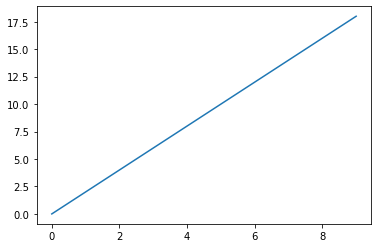

In [32]:
# Let us try plotting a linear relationship
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

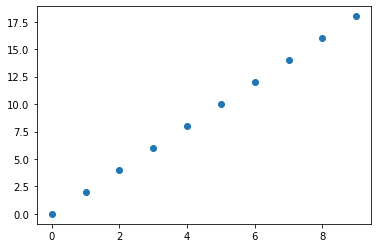

In [33]:
# If we want to view the points individually we can use the plt.scatter function
plt.scatter(x, y)
plt.show()

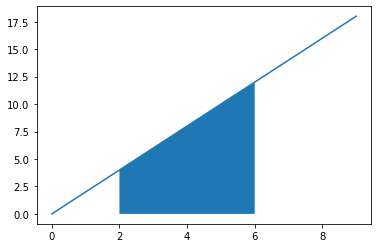

In [34]:
# If we want to visualize a plot with a shaded region representing an interval we use the plt.fill_between() method
plt.plot(x, y)
where = [is_in_interval(value, 2, 6 ) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

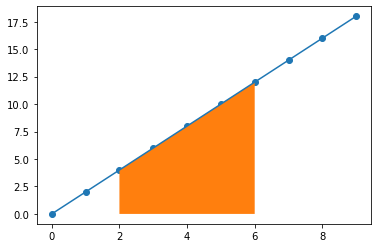

In [35]:
# Let us visualize everything we've tried so far in one plot
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

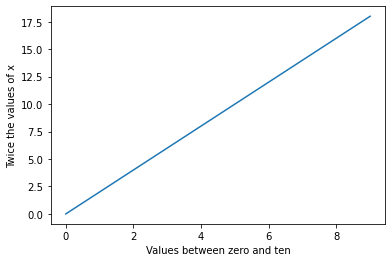

In [36]:
# No data plot is ever truly complete without x-axis label and y-axis label so let's add that
plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

Plotting coin-flip probabilities

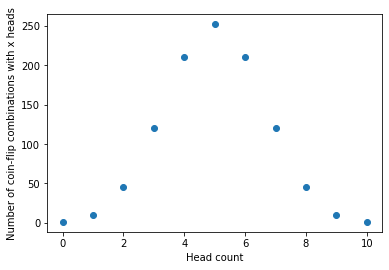

In [37]:
# Now we are going to compare the plotted data from the wighted_sample_space dictionary and the
# weighted_sample_space_20_flips dictionary
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

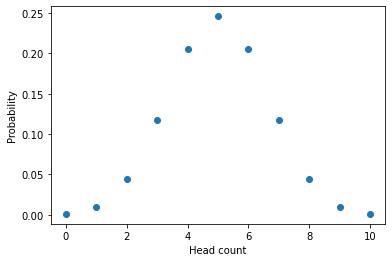

In [38]:
# From the above visualiztion we can notice a peak at 5 meaning combinations closer to 5 occur more frequently tha those further from 5
# Thus a head count is more probable when it is closer to 5 
# Let us emphasize this by plotting the probabilities directly on the y-axis 
# We can compute the probbilities by taking our existing combination counts and dividing them by the total sample size 
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head count')
plt.ylabel('Probability')
plt.show()

In [39]:
# Our plot above aids us to visually estimate the probability of any head count
# Just by looking at the plot we can see that the probability of observing 5 heads is approximately 0.25
# This mapping between x-values and probabilities is known a probability distribution
# Let us not forget that all probabilities must sum up to 1.0, let us confirm this
assert sum(prob_x_10_flips) == 1.0

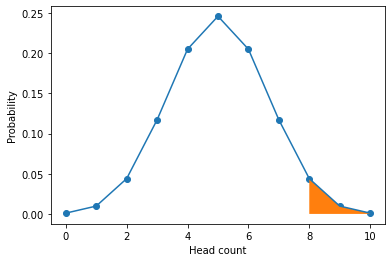

In [40]:
# Let us try shading the area under a probability curve
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where = where)
plt.xlabel('Head count')
plt.ylabel('Probability')
plt.show()

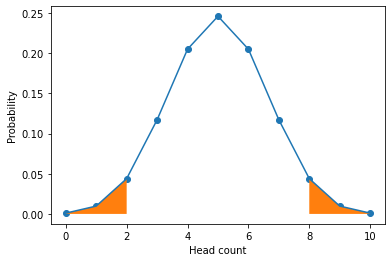

In [41]:
# Now we are going to shade the intervals under the extreme points

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where = where)
plt.xlabel('Head count')
plt.ylabel('Probability')
plt.show()

In [42]:
# Computing probabilities for a 20-coin-flip distribution

x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

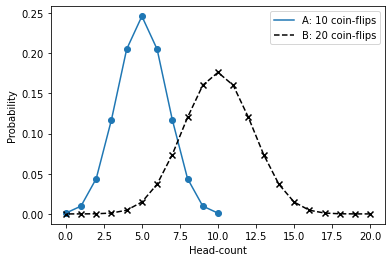

In [44]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--',
label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()


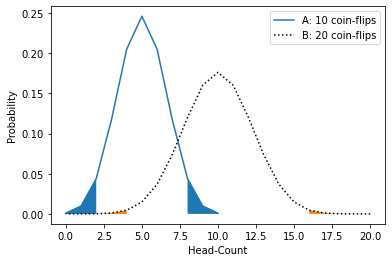

In [45]:
# Highlighting interval beneath two plotted distributions

plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle=':',
label='B: 20 coin-flips')
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)
plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.legend()
plt.show()

